# Project: Wrangling and Analyze Data

## Data Gathering

1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
#Importing needed libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import requests


In [2]:
#Uploading the twitter_archive_enhanced dataset into the workspace

twitter_archive=pd.read_csv('twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
#Using requests and url to get the tweet image predictions

url= 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response=requests.get(url)
response

<Response [200]>

In [4]:
with open(url.split('/')[-1], mode='wb') as file:
    file.write(response.content)

In [5]:
#Reading the file into a dataframe

image=pd.read_csv('image-predictions.tsv',sep='\t')

3. Reading the (tweet_json.txt) into a dataframe

In [6]:
import tweepy
import configparser
import json
from timeit import default_timer as timer

#reading contents from API access file where the keys are stored
config=configparser.ConfigParser()
config.read('API_access')


API_key =config['Twitter']['API_key'] 
API_key_secret =config['Twitter']['API_key_secret']
access_token =config['Twitter'] ['access_token']
access_token_secret = config['Twitter']['access_token_secret']

#authentication
auth = tweepy.OAuthHandler(API_key, API_key_secret)
auth.set_access_token(access_token, access_token_secret)



api = tweepy.API(auth, wait_on_rate_limit=True,wait_on_rate_limit_notify=True)


In [7]:
search_query = "#WeRateDogs"
# get tweets from the API
tweets = tweepy.Cursor(api.search,
              q="#WeRateDogs since:"+str(2017), 
              lang="en").items()
# store the API responses in a list
tweets_copy = []
for tweet in tweets:
    tweets_copy.append(tweet)
    
print("Total Tweets fetched:", len(tweets_copy))

Total Tweets fetched: 24


In [9]:
import json
df = []
#reading the json file
with open('tweet-json.txt', 'r') as Json_file:
    
    for data in Json_file:
        tweet = (json.loads(data))
        tweet_id = tweet['id']
        retweet_count = tweet['retweet_count']
        favorite_count = tweet['favorite_count']
        create_date = tweet['created_at']
        df.append({'retweet_count' : retweet_count,
                  'favorite_count' : favorite_count,
                  'create_date' : create_date,
                  'tweet_id' : tweet_id})
        
#saving the tweet-json.txt file into a dataframe 
Tweet = pd.DataFrame(df, columns = ['tweet_id','create_date', 'retweet_count', 'favorite_count'])


## Assessing Data


<b><h3/>Visual assessment

In [10]:
#Assessing the twitter_archives data
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [11]:
twitter_archive.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [12]:
#Assessing image-predictions data
image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [13]:
#Assessing twitter data
Tweet.head()

,tweet_id,create_date,retweet_count,favorite_count
0,892420643555336193,Tue Aug 01 16:23:56 +0000 2017,8853,39467
1,892177421306343426,Tue Aug 01 00:17:27 +0000 2017,6514,33819
2,891815181378084864,Mon Jul 31 00:18:03 +0000 2017,4328,25461
3,891689557279858688,Sun Jul 30 15:58:51 +0000 2017,8964,42908
4,891327558926688256,Sat Jul 29 16:00:24 +0000 2017,9774,41048


<b><h3/>Programmatic assessment

In [14]:
#Assessing twitter_archive data
twitter_archive.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


In [15]:
twitter_archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
505,812781120811126785,NaN,NaN,2016-12-24 22:04:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Swagger. He's the Cleveland Browns amb...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/812781120...,10,10,Swagger,None,None,None,None
1264,709918798883774466,NaN,NaN,2016-03-16 01:46:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Watson. He's a Suzuki Tickleboop. Leader ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/709918798...,12,10,Watson,None,None,None,None
44,883838122936631299,NaN,NaN,2017-07-09 00:00:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Noah. He can't believe someone made th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/883838122...,12,10,Noah,None,None,None,None
1956,673612854080196609,NaN,NaN,2015-12-06 21:19:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jeffri. He's a speckled ice pupper. Ve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673612854...,7,10,Jeffri,None,None,pupper,None
387,826598799820865537,8.265984e+17,4.196984e+09,2017-02-01 01:11:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...","I was going to do 007/10, but the joke wasn't ...",NaN,NaN,NaN,NaN,7,10,None,None,None,None,None


In [16]:
#Checking datatypes and entries
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [17]:
#Checking missing values in expanded urls column
twitter_archive['expanded_urls'].isnull().sum()

59

In [18]:
#Checking names given to dogs
twitter_archive['name']

0        Phineas
1          Tilly
2         Archie
3          Darla
4       Franklin
5           None
6            Jax
7           None
8           Zoey
9         Cassie
10          Koda
11         Bruno
12          None
13           Ted
14        Stuart
15        Oliver
16           Jim
17          Zeke
18       Ralphus
19        Canela
20        Gerald
21       Jeffrey
22          such
23        Canela
24          None
25          None
26          Maya
27        Mingus
28         Derek
29        Roscoe
          ...   
2326       quite
2327           a
2328        None
2329        None
2330        None
2331        None
2332        None
2333          an
2334           a
2335          an
2336        None
2337        None
2338        None
2339        None
2340        None
2341        None
2342        None
2343        None
2344        None
2345         the
2346         the
2347           a
2348           a
2349          an
2350           a
2351        None
2352           a
2353          

In [19]:
#Checking for duplicates
twitter_archive.duplicated().sum()

0

In [20]:
#Checking for duplicated urls
twitter_archive['expanded_urls'].duplicated().any()

True

In [21]:
#Assessing image-predictions data
image.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
773,689599056876867584,https://pbs.twimg.com/media/CZHyrvOXEAEin-A.jpg,1,dogsled,0.426494,False,cocker_spaniel,0.073101,True,Chihuahua,0.070323,True
1504,785170936622350336,https://pbs.twimg.com/media/CuV8yfxXEAAUlye.jpg,2,seat_belt,0.891193,False,Eskimo_dog,0.027494,True,Samoyed,0.019530,True
936,703425003149250560,https://pbs.twimg.com/media/CcMRSwUW8AAxxNC.jpg,1,miniature_pinscher,0.292866,True,sleeping_bag,0.142122,False,Italian_greyhound,0.070849,True
732,686730991906516992,https://pbs.twimg.com/media/CYfCMdFWAAA44YA.jpg,1,Tibetan_mastiff,0.338812,True,Newfoundland,0.180925,True,golden_retriever,0.180023,True
40,666691418707132416,https://pbs.twimg.com/media/CUCQTpEWEAA7EDz.jpg,1,German_shepherd,0.975401,True,beagle,0.008687,True,bloodhound,0.005394,True


In [22]:
#Checking for duplicates
image.duplicated().sum()

0

In [23]:
image.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [24]:
#Checking for missing values
image.isnull().any()

tweet_id    False
jpg_url     False
img_num     False
p1          False
p1_conf     False
p1_dog      False
p2          False
p2_conf     False
p2_dog      False
p3          False
p3_conf     False
p3_dog      False
dtype: bool

In [25]:
#Confirming datatypes and entries
image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [26]:
#Checking for duplicated urls
image['jpg_url'].duplicated().sum()

66

In [27]:
#Assessing Additional twitter data
Tweet.head()

,tweet_id,create_date,retweet_count,favorite_count
0,892420643555336193,Tue Aug 01 16:23:56 +0000 2017,8853,39467
1,892177421306343426,Tue Aug 01 00:17:27 +0000 2017,6514,33819
2,891815181378084864,Mon Jul 31 00:18:03 +0000 2017,4328,25461
3,891689557279858688,Sun Jul 30 15:58:51 +0000 2017,8964,42908
4,891327558926688256,Sat Jul 29 16:00:24 +0000 2017,9774,41048


In [28]:
#Confirming datatypes and entries
Tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
tweet_id          2354 non-null int64
create_date       2354 non-null object
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3), object(1)
memory usage: 73.6+ KB


In [29]:
#Checking for any missing values
Tweet.isnull().any()

tweet_id          False
create_date       False
retweet_count     False
favorite_count    False
dtype: bool

### Quality issues
> Twitter_archives_csv


1.Mismatched datatypes in timestamp should be datetime not object.

2.Finding incorrect ratings visually and updating them manually. 

3.Some columns have null values which are entered as none instead of NaN.

4.In dog names column,some dog names are recorded as None,such,the,quite,an.

5.Some expanded_urls are duplicated.

6.Removing rows that have non-empty:retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp. 

7.Some columns in twitter_archies_enhanced_csv are not relevant to my analysis need to be dropped(e.g retweeted_status_id,retweeted_status_timestamp e.t.c)


> Image-Predictions-csv

8.Some jpg_urls are duplicated.

>Additional_tweet.json

9.Create_date is datatype object instead of datetime.



### Tidiness issues
1.In twitter_archives_enhanced_csv Dog stages are spread into different columns(puppo,pupper,doggo,floofer)

2.Melting the image_predictions dataframe.

3.Merging all dataframes to one master dataset.

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [30]:
# Make copies of original pieces of data
twitter_archive_copy=twitter_archive.copy()
image_copy=image.copy()
Tweet_copy=Tweet.copy()

<b><h3>Quality issues

### Issue #1:Mismatched datatypes in timestamp in twitter_archive data

#### Define:The timestamp datatype is object instead of datetime

#### Code

In [31]:
#Changing timestamp datatype to datetime
twitter_archive_copy['timestamp']=pd.to_datetime(twitter_archive_copy['timestamp'])

#### Test

In [32]:
twitter_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns](1

<b><h3/>Issue #2:Finding incorrect ratings visually and updating them manually.

<b>Define:Extracted rating numerator and denominator were 24 and 7,in tweet id  835246439529840640 Correct ones should be 13 and 10.

<b>Code

In [33]:
#Finding incorrect ratings vissually
numerator=twitter_archive_copy[twitter_archive_copy['rating_numerator']>20]
numerator
numerator[['tweet_id','rating_numerator','text']]

,tweet_id,rating_numerator,text
188,855862651834028034,420,@dhmontgomery We also gave snoop dogg a 420/10...
189,855860136149123072,666,@s8n You tried very hard to portray this good ...
290,838150277551247360,182,@markhoppus 182/10
313,835246439529840640,960,@jonnysun @Lin_Manuel ok jomny I know you're e...
340,832215909146226688,75,"RT @dog_rates: This is Logan, the Chow who liv..."
433,820690176645140481,84,The floofs have been released I repeat the flo...
516,810984652412424192,24,Meet Sam. She smiles 24/7 &amp; secretly aspir...
695,786709082849828864,75,"This is Logan, the Chow who lived. He solemnly..."
763,778027034220126208,27,This is Sophie. She's a Jubilant Bush Pupper. ...
902,758467244762497024,165,Why does this never happen at my front door......


<b>Test

In [34]:
#Extracted denominatorr was 7,in tweet id  835246439529840640 Correct one should be 10.
df2=twitter_archive_copy[twitter_archive_copy['tweet_id']== 810984652412424192]

replacements={'rating_denominator':{7:10}}
twitter_archive_copy.replace(replacements,regex=True,inplace=True)


In [35]:
#Extracted numerator was 24,in tweet id  835246439529840640 Correct one should be 13.
df2=twitter_archive_copy[twitter_archive_copy['tweet_id']== 810984652412424192]
replacements={'rating_numerator':{24:13}}
twitter_archive_copy.replace(replacements,regex=True,inplace=True)


<b>Test

In [36]:
df2=twitter_archive_copy[twitter_archive_copy['tweet_id']== 810984652412424192]
df2

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",13,10,Sam,None,None,None,None


<b><h3/>Issue #3:Some columns have null values which are entered as None instead of NaN.

<b>Code

In [37]:
twitter_archive_copy.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


In [38]:
#Replacing None values with Nan
twitter_archive_copy.replace('None',np.nan,inplace=True)

<b>Test

In [39]:
#Confirming None values have been replaced
twitter_archive_copy.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,NaN,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,NaN,NaN,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,NaN,NaN,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,NaN,NaN,NaN


<b><h3>Issue #4:In dog names column,some dog names are recorded as None,such,the,quite,an,e.t.c.

<b>Define:The names are invalid and we'll replace with Nan.

<b>Code

In [40]:
#Replacing invalid dog names
replacements={'name':{'such':np.nan,'None':np.nan,'quite':np.nan,'the':np.nan,'this':np.nan,'a':np.nan,'an':np.nan}}
twitter_archive_copy.replace(replacements,regex=True,inplace=True)

<b>Test

In [41]:
#Confirming NaN values have replaced the replacements
twitter_archive_copy['name'].isna().sum()

1411

In [42]:
twitter_archive_copy['name'].value_counts()

Cooper      11
Oliver      11
Lucy        11
Tucker      10
Penny       10
Winston      9
Bo           9
Buddy        7
Toby         7
Scout        6
Rusty        6
Milo         6
Leo          6
Alfie        5
Finn         5
Chester      5
Sunny        5
Louis        5
Gus          5
very         5
Phil         5
Bentley      5
George       5
Bruce        4
Riley        4
Jerry        4
Moose        4
Winnie       4
Loki         4
Duke         4
            ..
Juckson      1
Pluto        1
Vinnie       1
Pepper       1
Pinot        1
Edd          1
Joey         1
Robin        1
Stewie       1
Dido         1
Ace          1
Beebop       1
Rumpole      1
Fillup       1
Jeb          1
Filup        1
Comet        1
Dobby        1
Henry        1
Rolf         1
Ferg         1
Bobby        1
Bluebert     1
Sobe         1
Kobe         1
Willow       1
Rose         1
Aubie        1
Chubbs       1
Snicku       1
Name: name, Length: 591, dtype: int64

<b><h3>Issue #5:Some expanded_urls are duplicated.

<b>Define:Dropping duplicated rows.

<b>Code

In [43]:
#Removing duplicates
twitter_archive_copy['expanded_urls'].drop_duplicates(inplace=True)

<b>Test

In [44]:
#Confirming there are no duplicates of expanded_urls
twitter_archive_copy['expanded_urls'].duplicated().any()

False

<b><h3>Issue#6:Removing rows that have non-empty:retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp. 

<b>Code

In [45]:
twitter_archive_copy.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [46]:
#Getting the sum of rows that have non-empty retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp
print(twitter_archive_copy['retweeted_status_id'].notna().sum())
print(twitter_archive_copy['retweeted_status_user_id'].notna().sum())
print(twitter_archive_copy['retweeted_status_timestamp'].notna().sum())


181
181
181


<b>Since rows that have non-empty retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp,are the same we'll just drop rows with non-empty retweeted_status_id.

In [47]:
#Getting roes with non-empty retweeted_status_id
df1=twitter_archive_copy[twitter_archive_copy['retweeted_status_id'].notna()]
df1.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,NaN,NaN,NaN,NaN,NaN
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,NaN,NaN,NaN,NaN,NaN
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,NaN,NaN,NaN,NaN
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,NaN,NaN,NaN,NaN
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,NaN,NaN,NaN,NaN,NaN


In [48]:
#Dropping rows with non-empty retweeted_status_id,retweeted_status_timestamp,retweeted_status_user_id

twitter_archive_copy.drop(twitter_archive_copy[twitter_archive_copy['retweeted_status_id'].notna()].index,inplace=True)

In [49]:
#Checking if the rows have been dropped
twitter_archive_copy[twitter_archive_copy['retweeted_status_user_id'].notna()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


<b>Test

In [50]:
twitter_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null datetime64[ns]
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          882 non-null object
doggo                         87 non-null object
floofer                       10 non-null object
pupper                        234 non-null object
puppo                         25 non-null object
dtypes: datetime64[ns](1), float64(4),

<b><h3>Issue #7:Some columns in twiitter_archives_csv are not relevant to my analysis need to be dropped(e.g retweeted_status_id,retweeted_status_timestamp e.t.c)

<b>Define:Dropping irrelevant columns

<b>Code

In [51]:
twitter_archive.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [52]:
#Dropping irrelevant columns

twitter_archive_copy.drop(['in_reply_to_status_id', 'in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','text', 'retweeted_status_timestamp'],axis=1,inplace=True)

<b>Test

In [53]:
twitter_archive_copy.head(3)

,tweet_id,timestamp,source,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/892420643...,13,10,NaN,NaN,NaN,NaN,NaN
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,NaN,NaN
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,NaN,NaN,NaN


<b><h3>Issue #8:Some jpg_urls are duplicated in image-prediction data.

<b>Define:Removing duplicated jpg_urls

<b>Code

In [54]:
#Dropping duplicates
image_copy['jpg_url'].drop_duplicates(inplace=True)

<b>Test

In [55]:
#Confirming all duplicates have been dropped
image_copy['jpg_url'].duplicated().any()

False

<b><h3>Issue #9:Create_date is datatype object instead of datetime in Additional Tweet data.

<b>Define:Change datatype to datetime

<b>Code

In [56]:
#Changing the datatype to datetime
Tweet['create_date']=pd.to_datetime(Tweet['create_date'])

In [57]:
#Testing
Tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
tweet_id          2354 non-null int64
create_date       2354 non-null datetime64[ns]
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: datetime64[ns](1), int64(3)
memory usage: 73.6 KB


<b><h3>Tidiness issues

<b><h3>Issue #1:In twitter_archives_enhanced_csv Dog stages are spread into different columns(puppo,pupper,doggo,floofer)

<b>Define:Melting(puppo,doggo,pupper,floofer) into one column.

<b>Code

In [58]:
twitter_archive_copy.columns

Index(['tweet_id', 'timestamp', 'source', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [59]:
#Melting the columns

twitter_archive_copy = pd.melt(twitter_archive_copy, id_vars=['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp', 'source','text','retweeted_status_id','retweeted_status_timestamp', 'expanded_urls', 'rating_numerator','rating_denominator', 'name'],
                           value_vars=['doggo', 'floofer', 'pupper', 'puppo'],var_name='dog_stage',value_name='stage')




/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


In [60]:
twitter_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8700 entries, 0 to 8699
Data columns (total 14 columns):
tweet_id                      8700 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     8700 non-null datetime64[ns]
source                        8700 non-null object
text                          0 non-null float64
retweeted_status_id           0 non-null float64
retweeted_status_timestamp    0 non-null float64
expanded_urls                 8468 non-null object
rating_numerator              8700 non-null int64
rating_denominator            8700 non-null int64
name                          3528 non-null object
dog_stage                     8700 non-null object
stage                         356 non-null object
dtypes: datetime64[ns](1), float64(5), int64(3), object(5)
memory usage: 951.6+ KB


In [61]:
twitter_archive_copy['stage'].value_counts()

pupper     234
doggo       87
puppo       25
floofer     10
Name: stage, dtype: int64

<b>Test

In [62]:
twitter_archive_copy.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,stage
4962,778624900596654080,NaN,NaN,2016-09-21 16:00:17,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/778624900...,11,10,Penny,pupper,NaN
1471,683515932363329536,NaN,NaN,2016-01-03 05:11:12,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",NaN,NaN,NaN,https://vine.co/v/ibvnzrauFuV,11,10,NaN,doggo,NaN
1329,691483041324204033,NaN,NaN,2016-01-25 04:49:38,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/691483041...,5,10,NaN,doggo,NaN
559,786664955043049472,NaN,NaN,2016-10-13 20:28:35,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786664955...,12,10,NaN,doggo,NaN
8021,682242692827447297,NaN,NaN,2015-12-30 16:51:48,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/682242692...,11,10,NaN,puppo,NaN


<b><h3>Issue #2:Melting the image_predictions dataframe.

<b>Define:Melting columns;p1_conf,p2_conf,p3_conf,p1,p2 and p3,to get a long dataframe instead of a wide dataframe.

<b>Code

In [63]:
#Getting columns i want to be in the melted dataframe
df=list(image_copy.columns)[:2]
df

['tweet_id', 'jpg_url']

In [64]:
list(image_copy.columns)

['tweet_id',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog']

In [65]:
#Dropping columns not needed
image_copy.drop(['p1_dog','p2_dog','p3_dog','img_num'],axis=1,inplace=True)

In [66]:
image_copy.sample()

,tweet_id,jpg_url,p1,p1_conf,p2,p2_conf,p3,p3_conf
1972,869596645499047938,https://pbs.twimg.com/media/DBFtiYqWAAAsjj1.jpg,Chihuahua,0.955156,toy_terrier,0.008054,muzzle,0.006296


In [67]:
#Making a copy of image_copy to work with it
image1=image_copy.copy()

In [68]:
#Melting image1 dataframe to get all breeds in one column
image1 = pd.melt(image1, id_vars=df,
                           value_vars=['p1','p2','p3'],value_name='breed')


In [69]:
#Confirming the columns have been melted
image1.head()

,tweet_id,jpg_url,variable,breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,p1,Welsh_springer_spaniel
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,p1,redbone
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,p1,German_shepherd
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,p1,Rhodesian_ridgeback
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,p1,miniature_pinscher


In [70]:
#Making another copy
image2=image_copy.copy()

In [71]:
#Melting the confidence value columns
image2 = pd.melt(image2, id_vars=df,
                           value_vars=['p1_conf','p2_conf',
       'p3_conf'],var_name='variable',value_name='confidence')


In [72]:
#Confirming the columns have been melted
image2.head()

,tweet_id,jpg_url,variable,confidence
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,p1_conf,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,p1_conf,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,p1_conf,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,p1_conf,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,p1_conf,0.560311


In [73]:
#Merging the two melted dataframes to one dataframe
image_merged=pd.merge(left=image1,right=image2,on='tweet_id')
image_merged.sample(5)

,tweet_id,jpg_url_x,variable_x,breed,jpg_url_y,variable_y,confidence
13459,783347506784731136,https://pbs.twimg.com/media/CVuQ2LeUsAAIe3s.jpg,p2,Pembroke,https://pbs.twimg.com/media/CVuQ2LeUsAAIe3s.jpg,p2_conf,0.368566
16178,831552930092285952,https://pbs.twimg.com/media/C4pE-I0WQAABveu.jpg,p2,Pembroke,https://pbs.twimg.com/media/C4pE-I0WQAABveu.jpg,p3_conf,0.092143
12759,771171053431250945,https://pbs.twimg.com/media/CVgdFjNWEAAxmbq.jpg,p3,Eskimo_dog,https://pbs.twimg.com/media/CVgdFjNWEAAxmbq.jpg,p1_conf,0.978833
11525,750132105863102464,https://pbs.twimg.com/media/CmkBKuwWgAAamOI.jpg,p2,miniature_poodle,https://pbs.twimg.com/media/CmkBKuwWgAAamOI.jpg,p3_conf,0.085879
3414,673270968295534593,https://pbs.twimg.com/media/CVfwXuWWIAAqnoi.jpg,p2,Maltese_dog,https://pbs.twimg.com/media/CVfwXuWWIAAqnoi.jpg,p1_conf,0.610453


In [74]:
#Dropping duplicated and irrelevant columns
image_merged.drop(['jpg_url_y','jpg_url_x','variable_x'],axis=1,inplace=True)


<b>Test

In [75]:
#Getting the final merged dataframe
image_merged.sample(5)

,tweet_id,breed,variable_y,confidence
5451,679862121895714818,Appenzeller,p1_conf,0.523206
9577,715360349751484417,nail,p2_conf,0.073277
6762,688064179421470721,Norwegian_elkhound,p1_conf,0.240602
482,667012601033924608,African_hunting_dog,p3_conf,0.000057
12287,761599872357261312,Gordon_setter,p3_conf,0.129730


<b><h3>Issue #3:Merging all dataframes into one master dataframe.

<b>Define:Combining the datasets into one.

<b>Code

In [76]:
#Merging twitter_archives_csv and Additional twitter(Tweet) into one dataframe
twitter_merged=pd.merge(left=twitter_archive_copy,right=Tweet_copy,how='inner',on='tweet_id')

In [77]:
#Dropping duplicated columns
twitter_merged.drop(['create_date','dog_stage'],axis=1,inplace=True)

In [78]:
#Dropping duplicates
twitter_merged.drop_duplicates(inplace=True)

<b>Test

In [79]:
twitter_merged.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,stage,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,NaN,NaN,8853,39467
4,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,6514,33819
8,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,4328,25461
12,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,NaN,NaN,8964,42908
16,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,NaN,NaN,9774,41048


In [80]:
twitter_merged['stage'].value_counts()

pupper     234
doggo       87
puppo       25
floofer     10
Name: stage, dtype: int64

In [81]:
#Merging to one master dataset
twitter_clean=pd.merge(twitter_merged,image_merged,how='inner',on='tweet_id')

In [82]:
#Dropping duplicates
twitter_clean.drop_duplicates('tweet_id',inplace=True)

In [83]:
twitter_clean.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,stage,retweet_count,favorite_count,breed,variable_y,confidence
12375,693942351086120961,NaN,NaN,2016-01-31 23:42:03,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/693942351...,10,10,Kobe,NaN,413,1896,groenendael,p1_conf,0.550796
6687,762699858130116608,NaN,NaN,2016-08-08 17:19:51,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/762699858...,11,10,NaN,NaN,4190,13518,kelpie,p1_conf,0.519047
14274,682662431982772225,NaN,NaN,2015-12-31 20:39:41,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/682662431...,11,10,Joey,NaN,1207,3326,beagle,p1_conf,0.413824
2313,836989968035819520,NaN,NaN,2017-03-01 17:22:13,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/836989968...,12,10,Mookie,NaN,2610,13879,shopping_cart,p1_conf,0.572422
10935,706310011488698368,NaN,NaN,2016-03-06 02:46:44,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/706310011...,12,10,NaN,NaN,9034,23443,Pembroke,p1_conf,0.698165


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [84]:
twitter_clean.to_csv("twitter_archive_master.csv", index= False)

## Analyzing and Visualizing Data


### Insights and Visualization:
1.What is the highest rating and lowest rating?

2.What are the most common dog breed?

3.What is the highly rated dog breed?

4.What is the correlation between favorite_count and retweet_count

5.What is the most common dog name?

6.Which dog had the highest and lowest retweet_count?

7.What is the most common dog stage?

<b>1.What is the highest rating and lowest rating?

In [85]:
#Dog that received highest rating

twitter_clean.sort_values('rating_numerator',ascending=False).head(1)


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,stage,retweet_count,favorite_count,breed,variable_y,confidence
7758,749981277374128128,NaN,NaN,2016-07-04 15:00:45,"<a href=""https://about.twitter.com/products/tw...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/749981277...,1776,10,Atticus,NaN,2772,5569,bow_tie,p1_conf,0.533941


In [86]:
#Dog that received lowest rating

twitter_clean.sort_values('rating_numerator').head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,stage,retweet_count,favorite_count,breed,variable_y,confidence
2421,835152434251116546,NaN,NaN,2017-02-24 15:40:31,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/835152434...,0,10,NaN,NaN,3443,24574,swing,p1_conf,0.967066


<b>2.What are the most common dog breeds?

In [87]:
#Most common dog breeds
dog_breed=twitter_clean['breed'].value_counts().head(10)
dog_breed

golden_retriever      139
Labrador_retriever     95
Pembroke               88
Chihuahua              79
pug                    54
chow                   41
Samoyed                40
Pomeranian             38
toy_poodle             38
malamute               29
Name: breed, dtype: int64

In [88]:
#Getting the top golden retrievers
df=twitter_clean[twitter_clean['breed']=='golden_retriever'].sort_values('rating_numerator',ascending=False)

In [89]:
df.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,stage,retweet_count,favorite_count,breed,variable_y,confidence
13932,684225744407494656,NaN,NaN,2016-01-05 04:11:44,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/684225744...,143,130,NaN,NaN,239,1369,golden_retriever,p1_conf,0.203249
10143,713900603437621249,NaN,NaN,2016-03-27 01:29:02,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/713900603...,99,90,NaN,NaN,829,3062,golden_retriever,p1_conf,0.371816
2871,828650029636317184,NaN,NaN,2017-02-06 17:02:17,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/828650029...,14,10,one,NaN,1544,10467,golden_retriever,p1_conf,0.649209


The horizontal bar graph shows top ten dog breeds with their respective favorite counts.


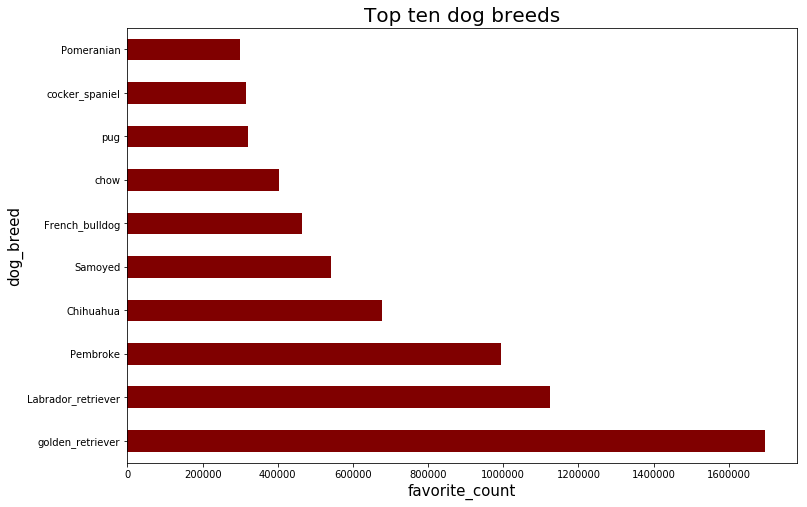

In [90]:
#Horizontal bar graph 
dog_breed=twitter_clean.groupby('breed')['favorite_count'].sum().sort_values(ascending=True).nlargest(10)
plt.figure(figsize=(12,8))

dog_breed.plot(kind='barh',color='maroon')
plt.title('Top ten dog breeds',fontsize=20)
plt.xlabel('favorite_count',fontsize=15)
plt.ylabel('dog_breed',fontsize=15)
print('The horizontal bar graph shows top ten dog breeds with their respective favorite counts.')

<b>3.What is the highly rated dog breed?

In [91]:
#The highly rated dog breed
twitter_clean.sort_values(by=['rating_numerator','breed'],ascending=False)[['rating_numerator','breed']].head(1)

,rating_numerator,breed
7758,1776,bow_tie


<b>4.What is the correlation between favorite_count and retweet_count

In [92]:
twitter_clean['favorite_count'].corr(twitter_clean['retweet_count'])

0.91294662741837007

The scatter plot is the best graph in showing correlation between retweet count and favorite count


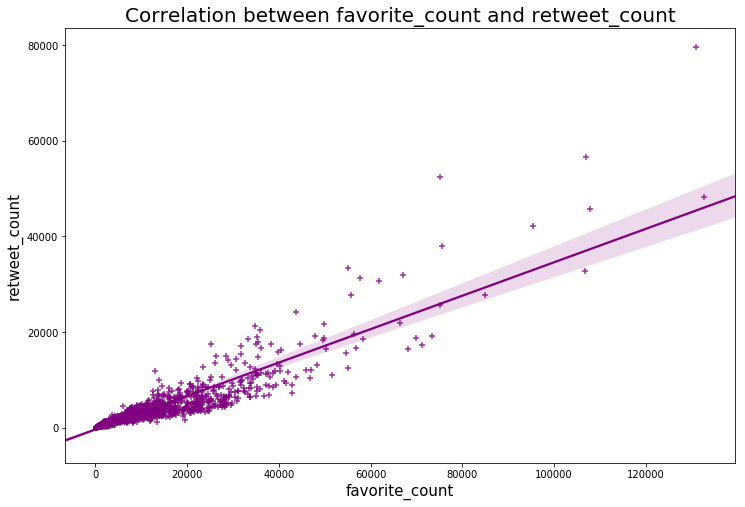

In [93]:
#Correlation plot between favorite_count and retweet_count
plt.figure(figsize=(12,8))
sns.regplot(x='favorite_count', y='retweet_count', data=twitter_clean,color='purple',marker='+')
plt.title('Correlation between favorite_count and retweet_count',fontsize=20)
plt.xlabel('favorite_count',fontsize=15)
plt.ylabel('retweet_count',fontsize=15)
print('The scatter plot is the best graph in showing correlation between retweet count and favorite count')

<b>5.What is the most common dog name?

In [94]:
#Most common dog names
twitter_clean['name'].value_counts().head()

Lucy      10
Cooper    10
Oliver    10
Penny      9
Tucker     9
Name: name, dtype: int64

<b>6.Which dog had the highest and lowest retweet_count?

In [95]:
#Dog with the highest retweet count
twitter_clean.sort_values('retweet_count',ascending=False).head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,stage,retweet_count,favorite_count,breed,variable_y,confidence
8262,744234799360020481,NaN,NaN,2016-06-18 18:26:18,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/744234799...,13,10,NaN,doggo,79515,131075,Labrador_retriever,p1_conf,0.825333


In [96]:
#Dog with the lowest retweet count
twitter_clean.sort_values('retweet_count').head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,stage,retweet_count,favorite_count,breed,variable_y,confidence
20646,666102155909144576,NaN,NaN,2015-11-16 03:55:04,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/666102155...,11,10,NaN,NaN,16,81,English_setter,p1_conf,0.298617


<b>7.What is the most common dog stage?

In [97]:
#Most common to least common dog stage
stage=twitter_merged['stage'].value_counts()
stage

pupper     234
doggo       87
puppo       25
floofer     10
Name: stage, dtype: int64

The horizontal bar graph shows most common dog stage with their respective favorite counts.


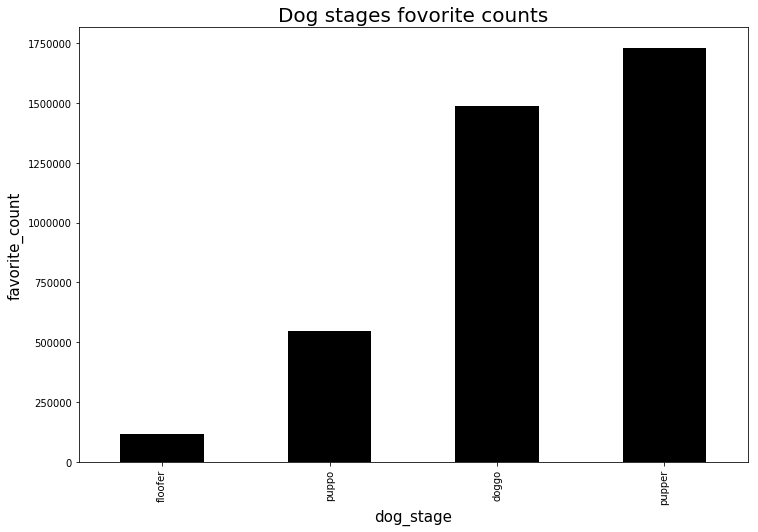

In [98]:
#Horizontal bar graph 
dog_stage=twitter_merged.groupby('stage')['favorite_count'].sum().sort_values(ascending=True)
plt.figure(figsize=(12,8))

dog_stage.plot(kind='bar',color='black')
plt.title('Dog stages fovorite counts',fontsize=20)
plt.xlabel('dog_stage',fontsize=15)
plt.ylabel('favorite_count',fontsize=15)
print('The horizontal bar graph shows most common dog stage with their respective favorite counts.')

The graph shows the count of each dog stage


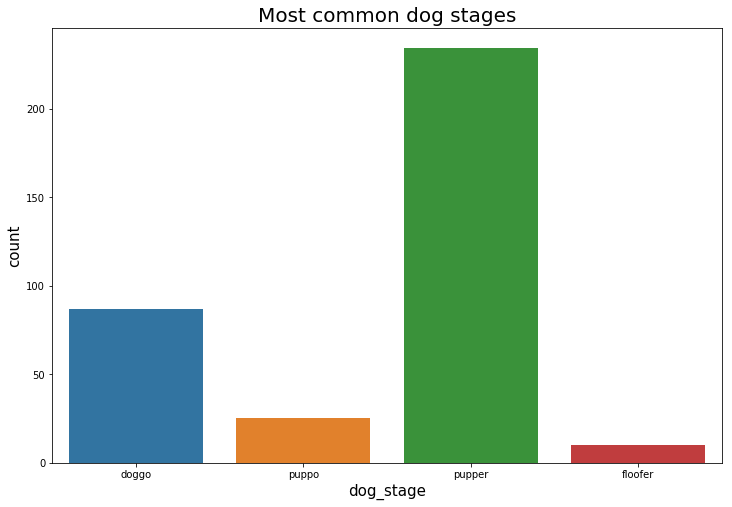

In [99]:
#Count plot on dog stages
plt.figure(figsize=(12,8))
sns.countplot(x='stage',data=twitter_merged)
plt.title('Most common dog stages',fontsize=20)
plt.xlabel('dog_stage',fontsize=15)
plt.ylabel('count',fontsize=15)
print('The graph shows the count of each dog stage')